http://pandas.pydata.org/pandas-docs/stable/10min.html#min

https://www.oreilly.com/learning/introducing-pandas-objects  basic intro

http://stackoverflow.com/questions/13226029/benefits-of-pandas-multiindex multiindex

Think of a dataframe as a specialization of a dictionary. Where a dictionary maps a key to a value, a data frame maps a column name to a Series of column data.

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time
from datetime import datetime, timedelta

# From dict

In [2]:
population_dict = {'California': 38332521,
'Texas': 26448193,
'New York': 19651127,
'Florida': 19552860,
'Illinois': 12882135}
population = pd.Series(population_dict)
population

California    38332521
Florida       19552860
Illinois      12882135
New York      19651127
Texas         26448193
dtype: int64

In [3]:
population.California

38332521

# Time series

In [4]:
s = pd.Series([1,3,5,np.nan,6,8])   # create a series
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [5]:
dates = pd.date_range('20130101', periods=6)   # create index dates
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [6]:
dates[0]

Timestamp('2013-01-01 00:00:00', freq='D')

In [7]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD')) # create a dataframe
df

,A,B,C,D
2013-01-01,-0.005950,-2.457328,1.240994,-0.927758
2013-01-02,1.400725,0.140462,0.326028,0.592748
2013-01-03,-0.365139,-0.921090,1.324970,1.064424
2013-01-04,-0.386419,-0.231153,1.365123,0.910923
2013-01-05,0.614433,-0.797826,0.114828,2.078910
2013-01-06,-1.408968,0.010321,0.998909,-0.703205


In [8]:
df.iloc[0]

A   -0.005950
B   -2.457328
C    1.240994
D   -0.927758
Name: 2013-01-01 00:00:00, dtype: float64

In [9]:
df.apply(lambda x: x.max() - x.min())

A    2.809693
B    2.597790
C    1.250295
D    3.006667
dtype: float64

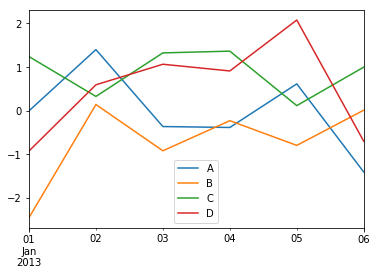

In [10]:
df.plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10b589fd0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10b734ac8>]], dtype=object)

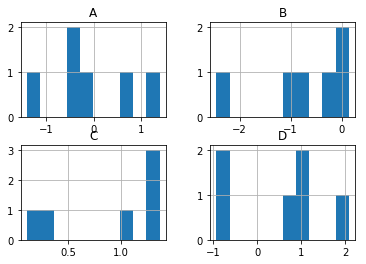

In [11]:
df.hist()

In [12]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
df.values  # underlying numpy data

array([[-0.0059499 , -2.45732804,  1.24099372, -0.92775768],
       [ 1.40072452,  0.14046157,  0.3260277 ,  0.59274832],
       [-0.36513912, -0.92109008,  1.32496997,  1.06442448],
       [-0.38641865, -0.23115327,  1.36512295,  0.91092319],
       [ 0.6144332 , -0.79782573,  0.11482824,  2.07890976],
       [-1.40896838,  0.01032141,  0.99890904, -0.70320537]])

In [15]:
df.describe()  # summary stats

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.025220,-0.709436,0.895142,0.502674
std,0.959543,0.956752,0.541996,1.137993
min,-1.408968,-2.457328,0.114828,-0.927758
25%,-0.381099,-0.890274,0.494248,-0.379217
50%,-0.185545,-0.514490,1.119951,0.751836
75%,0.459337,-0.050047,1.303976,1.026049
max,1.400725,0.140462,1.365123,2.078910


In [16]:
df.sort_index(axis=1, ascending=False) # sort the index

,D,C,B,A
2013-01-01,-0.927758,1.240994,-2.457328,-0.005950
2013-01-02,0.592748,0.326028,0.140462,1.400725
2013-01-03,1.064424,1.324970,-0.921090,-0.365139
2013-01-04,0.910923,1.365123,-0.231153,-0.386419
2013-01-05,2.078910,0.114828,-0.797826,0.614433
2013-01-06,-0.703205,0.998909,0.010321,-1.408968


In [17]:
df.sort_values(by='B')  # sort values

,A,B,C,D
2013-01-01,-0.005950,-2.457328,1.240994,-0.927758
2013-01-03,-0.365139,-0.921090,1.324970,1.064424
2013-01-05,0.614433,-0.797826,0.114828,2.078910
2013-01-04,-0.386419,-0.231153,1.365123,0.910923
2013-01-06,-1.408968,0.010321,0.998909,-0.703205
2013-01-02,1.400725,0.140462,0.326028,0.592748


In [18]:
df['A']  # get a single col

2013-01-01   -0.005950
2013-01-02    1.400725
2013-01-03   -0.365139
2013-01-04   -0.386419
2013-01-05    0.614433
2013-01-06   -1.408968
Freq: D, Name: A, dtype: float64

In [19]:
df.A

2013-01-01   -0.005950
2013-01-02    1.400725
2013-01-03   -0.365139
2013-01-04   -0.386419
2013-01-05    0.614433
2013-01-06   -1.408968
Freq: D, Name: A, dtype: float64

Indexing http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing

.loc is primarily label based

.iloc is primarily integer position based 

.ix supports mixed integer and label based access. I



In [20]:
df[:3]   # get first 3 rows

,A,B,C,D
2013-01-01,-0.005950,-2.457328,1.240994,-0.927758
2013-01-02,1.400725,0.140462,0.326028,0.592748
2013-01-03,-0.365139,-0.921090,1.324970,1.064424


In [21]:
df.loc[dates[0]]  # select by label

A   -0.005950
B   -2.457328
C    1.240994
D   -0.927758
Name: 2013-01-01 00:00:00, dtype: float64

In [22]:
df.loc[:,['A','B']]  # Selecting on a multi-axis by label, indexing    df.loc[row_indexer,column_indexer]

,A,B
2013-01-01,-0.005950,-2.457328
2013-01-02,1.400725,0.140462
2013-01-03,-0.365139,-0.921090
2013-01-04,-0.386419,-0.231153
2013-01-05,0.614433,-0.797826
2013-01-06,-1.408968,0.010321


http://pandas.pydata.org/pandas-docs/stable/indexing.html#the-lookup-method

http://stackoverflow.com/questions/34519402/lookup-table-errors

df.lookup: must pass iterables, row and col lookup lists. Returns an array. use pd.DataFrame() to return a dataframe

In [23]:
df.lookup([dates[0]], ['B'])    # index, column

array([-2.45732804])

# Merging

http://pandas.pydata.org/pandas-docs/stable/10min.html#merge

In [24]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,0.434881,0.450341,0.501017,-2.047165
1,0.490225,0.803843,0.218887,2.707867
2,1.080542,0.095069,-0.429396,0.368730
3,0.081142,-0.387710,0.361697,-1.661738
4,-0.585519,0.056537,0.002353,-0.457005
5,0.854795,0.551679,-0.206239,-0.371167
6,1.768296,-0.888486,-0.412970,-0.069210
7,0.717109,0.403935,-1.483216,0.652358
8,-1.086130,0.026754,-0.277015,-0.297871
9,0.628527,0.442433,-0.073528,-0.616032


In [25]:
pieces = [df[:3], df[3:7], df[7:]]    # list of dataframes
pieces

[          0         1         2         3
 0  0.434881  0.450341  0.501017 -2.047165
 1  0.490225  0.803843  0.218887  2.707867
 2  1.080542  0.095069 -0.429396  0.368730,
           0         1         2         3
 3  0.081142 -0.387710  0.361697 -1.661738
 4 -0.585519  0.056537  0.002353 -0.457005
 5  0.854795  0.551679 -0.206239 -0.371167
 6  1.768296 -0.888486 -0.412970 -0.069210,
           0         1         2         3
 7  0.717109  0.403935 -1.483216  0.652358
 8 -1.086130  0.026754 -0.277015 -0.297871
 9  0.628527  0.442433 -0.073528 -0.616032]

In [26]:
pd.concat(pieces)

,0,1,2,3
0,0.434881,0.450341,0.501017,-2.047165
1,0.490225,0.803843,0.218887,2.707867
2,1.080542,0.095069,-0.429396,0.368730
3,0.081142,-0.387710,0.361697,-1.661738
4,-0.585519,0.056537,0.002353,-0.457005
5,0.854795,0.551679,-0.206239,-0.371167
6,1.768296,-0.888486,-0.412970,-0.069210
7,0.717109,0.403935,-1.483216,0.652358
8,-1.086130,0.026754,-0.277015,-0.297871
9,0.628527,0.442433,-0.073528,-0.616032


# SQL type Joining

In [27]:
left = pd.DataFrame({'key': ['foo', 'bar', 'paz'], 'lval': [1, 2, 3]})
left

,key,lval
0,foo,1
1,bar,2
2,paz,3


In [28]:
right = pd.DataFrame({'key': [ 'paz', 'bar', 'foo'], 'rval': [4, 5, 6]})
right

,key,rval
0,paz,4
1,bar,5
2,foo,6


In [29]:
 pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,6
1,bar,2,5
2,paz,3,4


# Multiindex

In [30]:
np.arrays = [['one','one','one','two','two','two'],[1,2,3,1,2,3]]

df = pd.DataFrame(np.random.randn(6,2),index=pd.MultiIndex.from_tuples(list(zip(*np.arrays))),columns=['A','B'])

df  # This is the dataframe we have generated

A         B
one 1 -0.091092 -0.003711
    2  0.373894  1.771611
    3  1.716596  0.714716
two 1 -0.300821  1.155177
    2 -0.490407  0.788400
    3  0.593308  0.209093

## Dicts to df

Test how to generate a dataframe from a loop

In [31]:
def get_now():
    """Convenience to get the current time, in ms to 3 dp"""
    return datetime.now().strftime('%Y-%m-%d %H:%M:%S.%f')[:-3] # Milliseconds to 3 dp

In [32]:
get_now()

'2017-11-09 06:33:27.185'

In [114]:
frames = []  # hold generated dataframes in a list
for i in range(10):
    data = np.random.rand()
    #now = get_now()
    now = datetime.now()
    filename = "dummy_" + str(i)
    print(i, now, data, filename)
    temp_df = pd.Series({'Time':now, 'Sample':i, 'State':data, 'File name':filename})
    frames.append(temp_df)
    time.sleep(0.2)

0 2017-11-09 07:14:39.305779 0.059901293240380404 dummy_0
1 2017-11-09 07:14:39.511143 0.09481942944329635 dummy_1
2 2017-11-09 07:14:39.717954 0.3264565424762932 dummy_2
3 2017-11-09 07:14:39.923601 0.44467727719811845 dummy_3
4 2017-11-09 07:14:40.130433 0.011855931756308058 dummy_4
5 2017-11-09 07:14:40.333094 0.5673557793200492 dummy_5
6 2017-11-09 07:14:40.539667 0.7119625744726542 dummy_6
7 2017-11-09 07:14:40.746656 0.521147982738405 dummy_7
8 2017-11-09 07:14:40.951513 0.4716532667764314 dummy_8
9 2017-11-09 07:14:41.158597 0.5452076303040431 dummy_9


In [115]:
frames[0] # Show a single series

File name                       dummy_0
Sample                                0
State                         0.0599013
Time         2017-11-09 07:14:39.305779
dtype: object

In [116]:
my_df = pd.DataFrame(frames).set_index('Sample')
my_df.set_index('Time', inplace=True)
my_df

,File name,State
Time,,
2017-11-09 07:14:39.305779,dummy_0,0.059901
2017-11-09 07:14:39.511143,dummy_1,0.094819
2017-11-09 07:14:39.717954,dummy_2,0.326457
2017-11-09 07:14:39.923601,dummy_3,0.444677
2017-11-09 07:14:40.130433,dummy_4,0.011856
2017-11-09 07:14:40.333094,dummy_5,0.567356
2017-11-09 07:14:40.539667,dummy_6,0.711963
2017-11-09 07:14:40.746656,dummy_7,0.521148
2017-11-09 07:14:40.951513,dummy_8,0.471653


In [126]:
test_time = my_df.index.values[0] + np.timedelta64(1,'s') # Add a second 
test_time

numpy.datetime64('2017-11-09T07:14:40.305779000')

Get the first data after this time

In [127]:
found_index = my_df.index.asof(test_time)  # Returns the timestamp before the test - time
found_index

Timestamp('2017-11-09 07:14:40.130433')

In [129]:
my_df.loc[found_index]['State']  # The data at that timestamp

0.011855931756308058

In [165]:
def state_at_time(df, dtObj):
    """Check the last registered state at some time using asof.
    Passed df needs to be time indexed"""
    found_index = df.index.asof(dtObj) # Find the closest index asof time test_time
    if pd.isnull(found_index):             # If dtObj is before the first index of dt, will return NaT
        return float('nan')
    else:
        state = df.loc[found_index]['State']      # Get the state at the found_index
        return state


state_at_time(my_df, test_time)

0.011855931756308058

In [166]:
my_df.index.asof(test_time) 

Timestamp('2017-11-09 07:14:40.130433')

In [167]:
test_time2 = test_time - np.timedelta64(1,'D')
state_at_time(my_df, test_time2) 

nan

## Plot

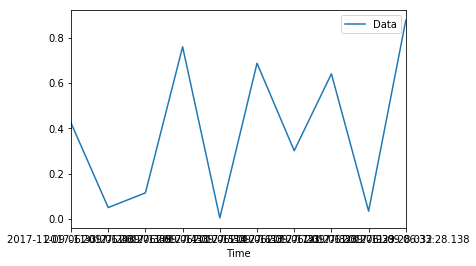

In [45]:
my_df.plot()

In [37]:
my_df['Data'].describe()

count    10.000000
mean      0.389191
std       0.333158
min       0.004617
25%       0.066462
50%       0.362163
75%       0.675276
max       0.876525
Name: Data, dtype: float64

In [38]:
my_df.to_csv('my_df.csv')

In [39]:
my_df.to_pickle('my_df.p')  # Lets also pickle the object

## Dict to csv
Bit ugly but this works.

In [40]:
my_dict = {'start':1, 'name':'test', 'val':3.134}

In [41]:
pd.DataFrame(list(my_dict.items())).to_csv('my_dict.csv')